In [1]:
import json
from pathlib import Path

import bezier
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bdd100k_path = Path('/home/sergei/Downloads/bdd100k')

bdd100k_images_path = bdd100k_path / 'images/100k'
bdd100k_train_images_path = bdd100k_images_path / 'train'
bdd100k_val_images_path = bdd100k_images_path / 'val'

bdd100k_labels_path = bdd100k_path / 'labels'
bdd100k_lane_labels_path = bdd100k_labels_path / 'lane/polygons'
bdd100k_train_lane_labels_path = bdd100k_lane_labels_path / 'lane_train.json'
bdd100k_val_lane_labels_path = bdd100k_lane_labels_path / 'lane_val.json'

frames_info = dict()

with open(bdd100k_train_lane_labels_path) as f:
    frames_info = json.load(f)

In [3]:
frames_info[1]['labels'][0]

{'id': '0',
 'attributes': {'laneDirection': 'parallel',
  'laneStyle': 'solid',
  'laneTypes': 'road curb'},
 'category': 'road curb',
 'poly2d': [{'vertices': [[1230.99113, 620.749416],
    [1097.642939, 531.482176],
    [826.538354, 414.663319],
    [829.844506, 367.274536]],
   'types': 'LCCC',
   'closed': False}]}

In [40]:
def draw_curve(img, curve, color_flag=None):
    n_points = 750
    for j in range(n_points):
        if color_flag is None:
            color = (255 - i * 50, 0, i * 10)
        else:
            color = color_flag
        a0, b0 = curve.evaluate(j * 1/n_points)
        radius=1
        img = cv2.circle(img, (int(a0[0]), int(b0[0])), radius, color, thickness=-1)

In [41]:
np.array([]).shape

(0,)

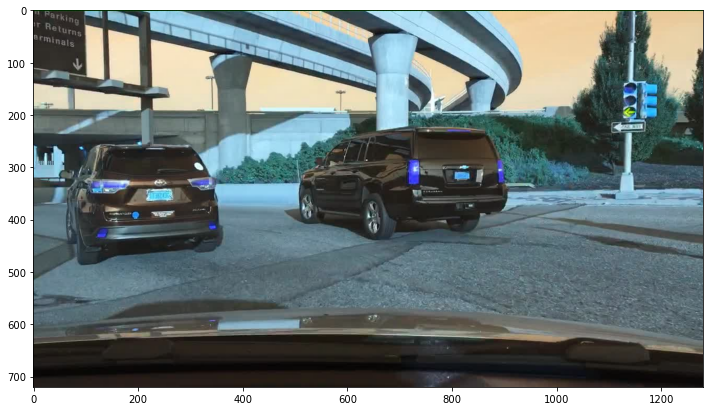

single white
single white
single white
single white
single white
single white


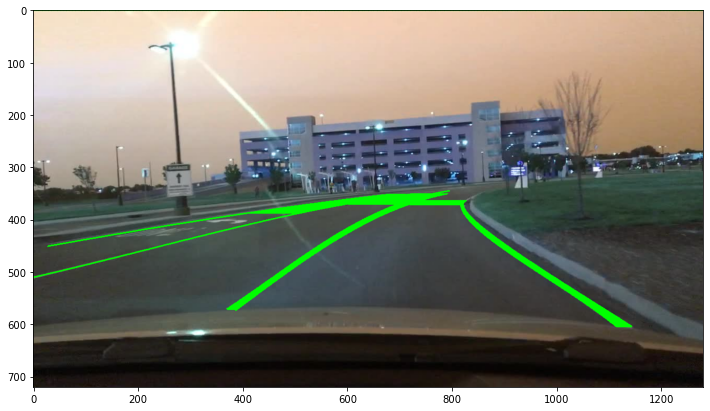

double yellow
double yellow


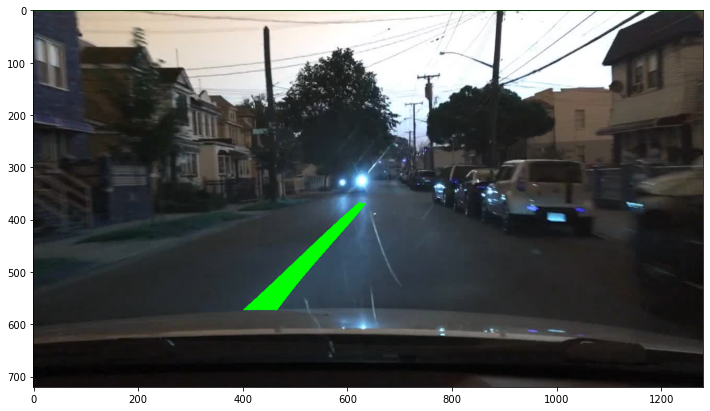

single white
single white


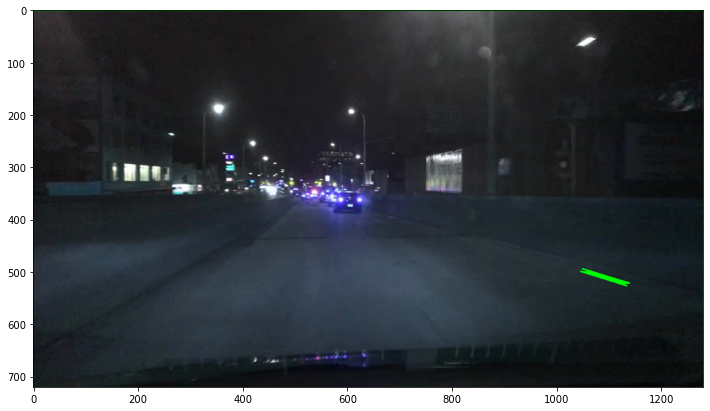

double yellow
double yellow


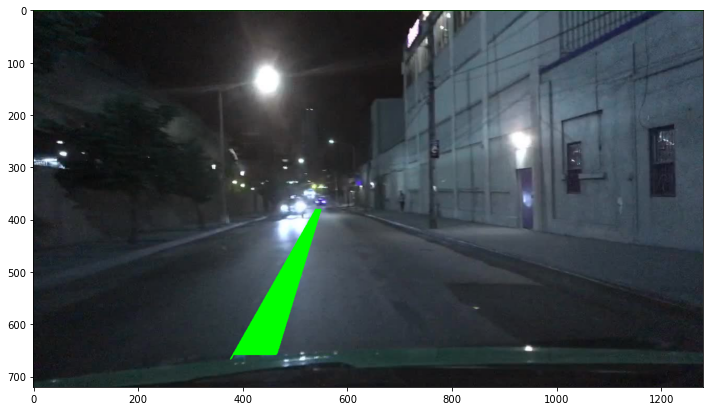

single white
single white


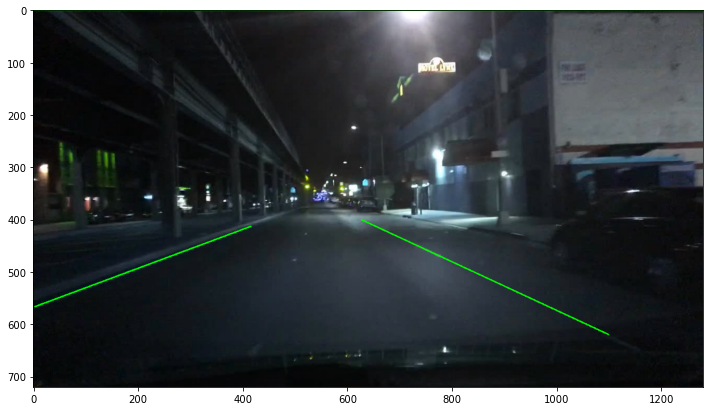

single white
single white
single white
single white
single white
single white


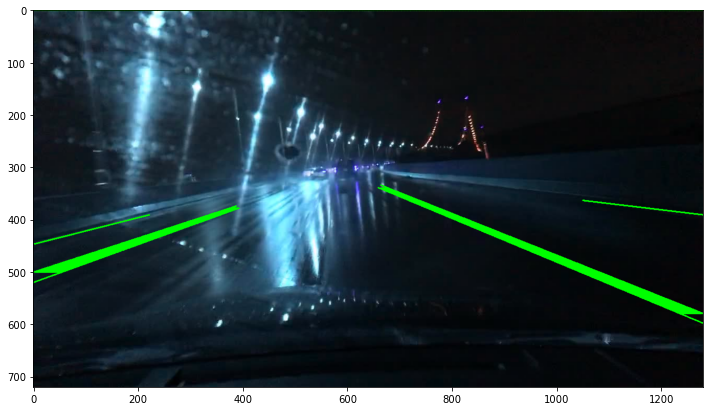

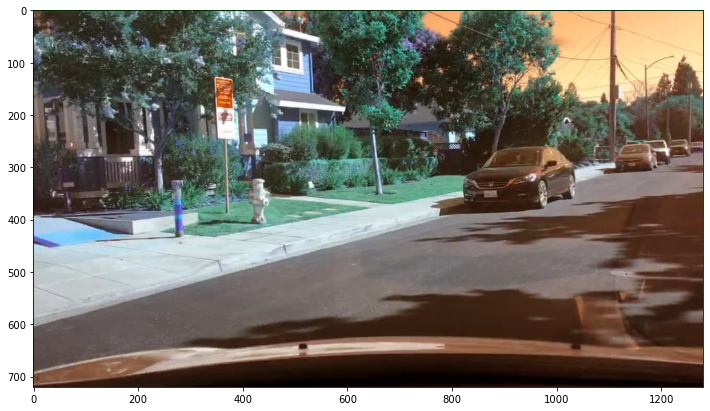

double yellow
double yellow
single white
single white
single white
single white
single white
single white


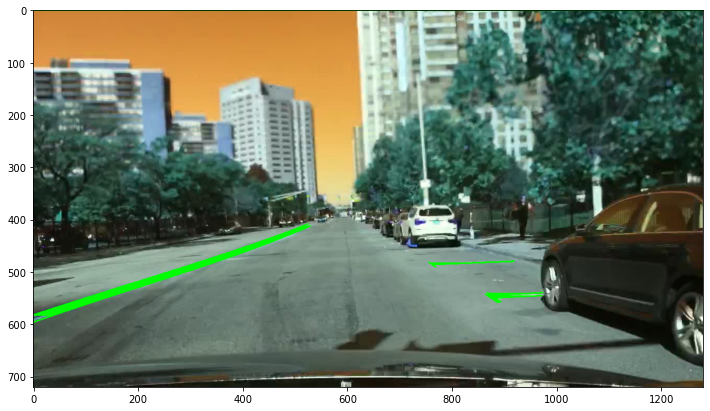

single white
single white
single yellow
single yellow


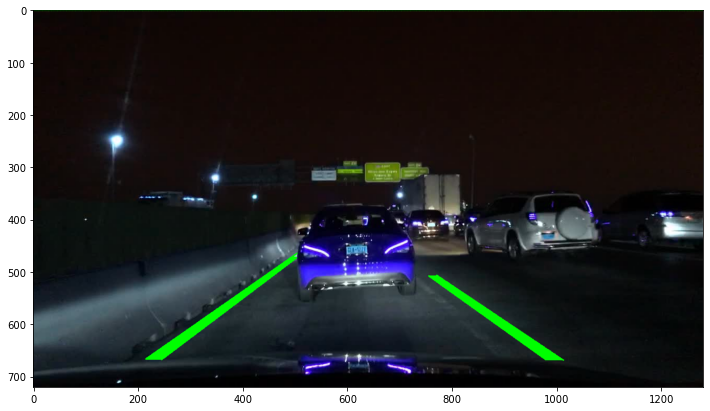

single white
single white
single white
single white
single white
single white


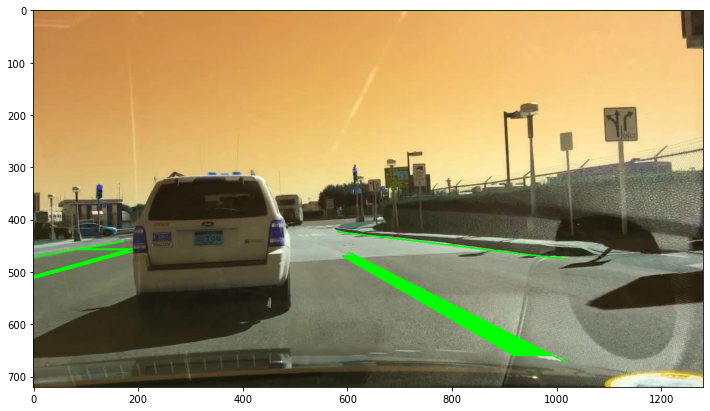

single white
single white
single white
single white
single white


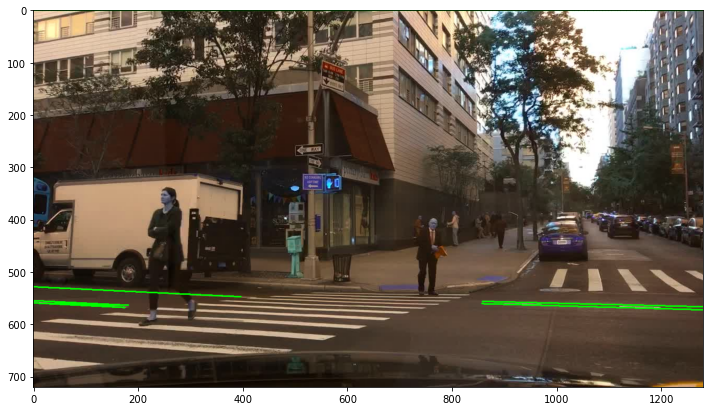

single white
single white
single white
single white
single white


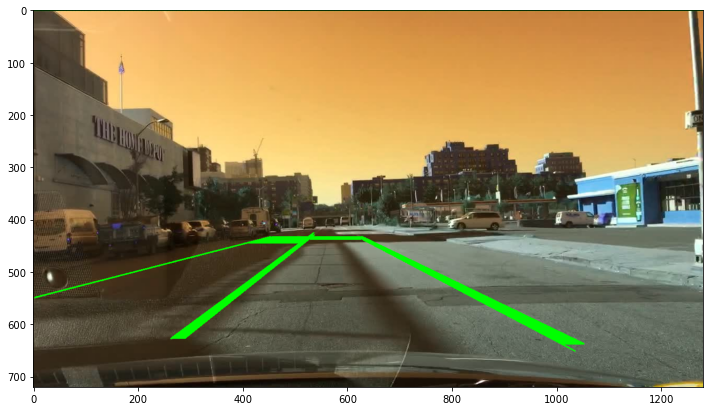

double yellow
double yellow
single white
single white
single white


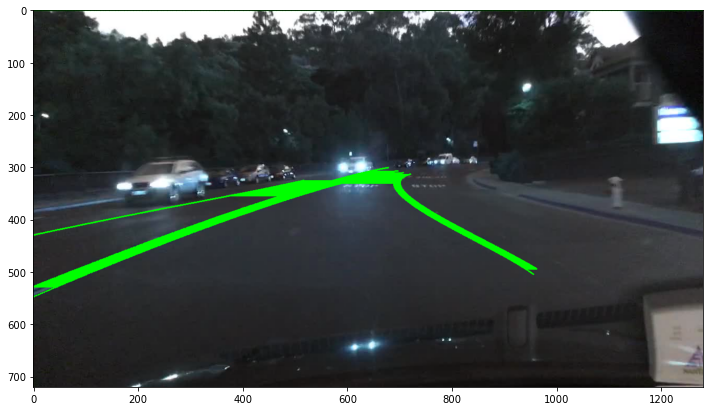

single white
double yellow
double yellow
single white
single white


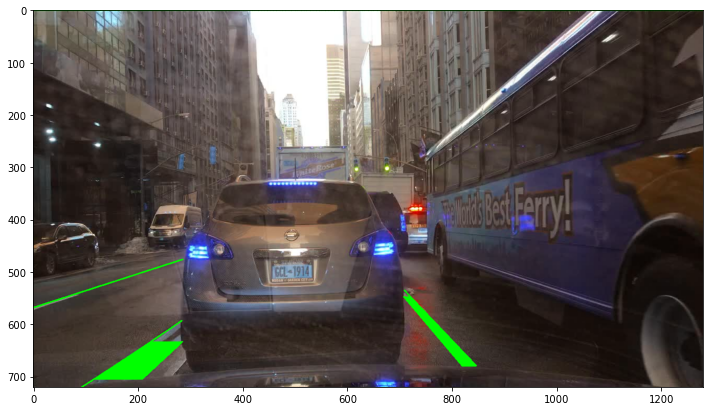

single white
single white
single white
single white


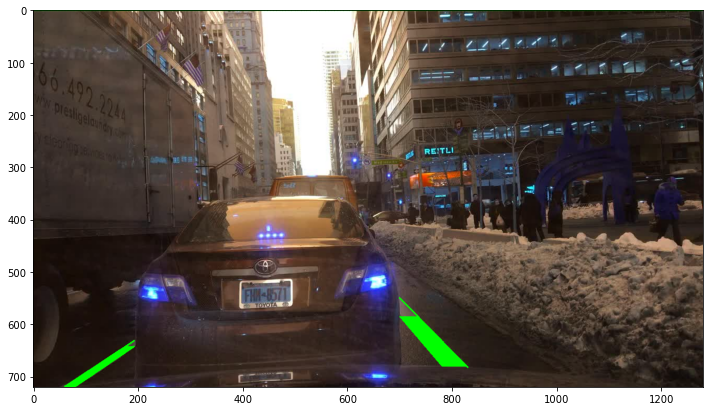

double yellow
single white


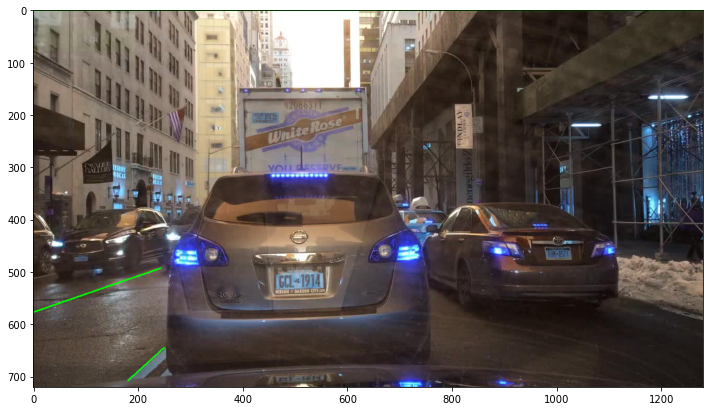

double yellow
double yellow
single white
single white
single white
single white


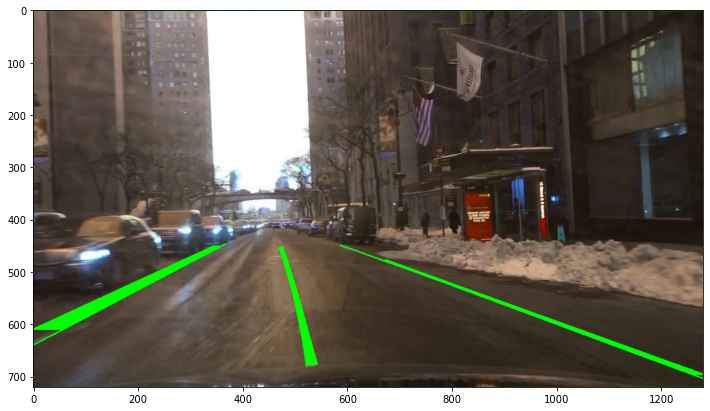

single white
single white


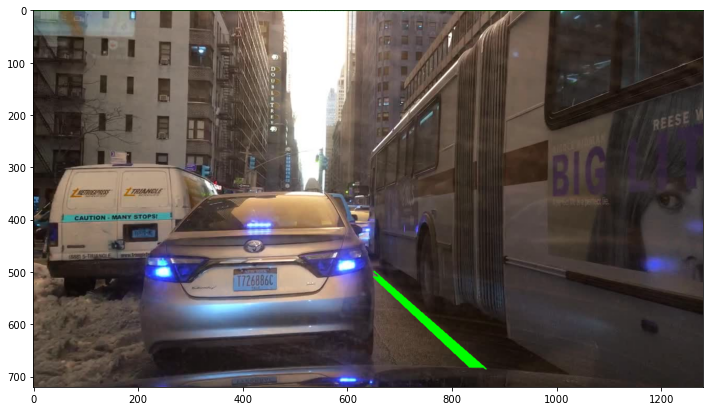

In [52]:
horizontal_curves = list()

for i in range(0, 800, 1):
    nodes = np.asarray([[0, 1280], [i, i]])

    horizontal_curve = bezier.Curve(
        nodes,
        degree=1,
    )
    horizontal_curves.append(horizontal_curve)

for frame_index in range(20):
    frame_info = frames_info[frame_index]
    if 'labels' not in frame_info.keys():
        continue

    img = cv2.imread(str(bdd100k_train_images_path / frame_info['name']))
    
    draw_curve(img, horizontal_curves[0], color_flag=(0, 255, 0))

    lane_curves = list()

    for i, lane in enumerate(frame_info['labels']):
        if lane['category'] in ['crosswalk', 'road curb']:
            continue
        else:
            print(lane['category'])

        lane_nodes = np.array(lane['poly2d'][0]['vertices'])
        lane_curve = bezier.Curve(
            lane_nodes.T,
            degree=lane_nodes.shape[0] - 1,
        )
        lane_curves.append(lane_curve)
        draw_curve(img, lane_curve, (0, 255, 0))
        
    for horizontal_curve in horizontal_curves:
        intersection_points = list()

        for lane_curve in lane_curves:
            intersection_point = lane_curve.intersect(horizontal_curve)
            intersection_point = lane_curve.evaluate_multi(intersection_point[0, :])

            if intersection_point.shape[1] != 0:
                x = int(intersection_point[0][0])
                y = int(intersection_point[1][0])
                '''
                for bias in range(-1, 2):
                    img = cv2.circle(
                        img,
                        (x, y),
                        radius=1,
                        color=(0, 255, 0),
                        thickness=-1,
                    )'''
                intersection_points.append((x, y))
                
        intersection_points.sort()

        for point_index in range(1, len(intersection_points)):
            x_start = int(intersection_points[point_index-1][0])
            x_end = int(intersection_points[point_index][0])
            delta_x = x_end - x_start
            if delta_x < 100: 
                y_start = int(intersection_points[point_index-1][1])
                y_end = int(intersection_points[point_index][1])
                for bias in range(-1, 2):
                    img = cv2.line(
                        img,
                        (x_start+1, y_start+bias),
                        (x_end-1, y_start+bias),
                        color=(0, 255, 0),
                        thickness=1,
                    )

    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.show()

In [7]:
### CULane

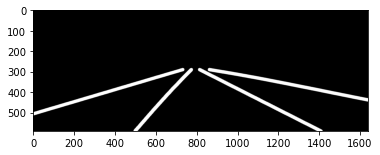

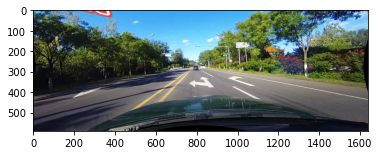

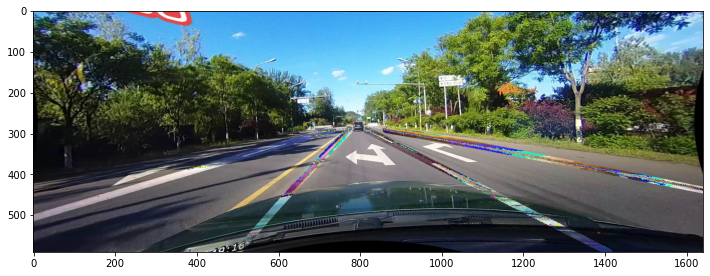

(590, 1640, 3)

In [58]:
culane_path = Path('/home/sergei/git/lanes/ultrafastlane/culane')

culane_info_path = culane_path / 'list/train_gt.txt'

with open(culane_info_path) as culane_info_file:
    lines = culane_info_file.readlines()
    
label_path = lines[0].split()[1]
image_path = lines[0].split()[0]

label_img = cv2.imread(str(culane_path) + label_path) * 255
raw_img = cv2.imread(str(culane_path) + image_path)
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

plt.imshow(label_img)
plt.show()
plt.imshow(raw_img)
plt.show()
plt.figure(figsize = (12, 12))
plt.imshow(raw_img * (1 - label_img))
plt.show()
img.shape

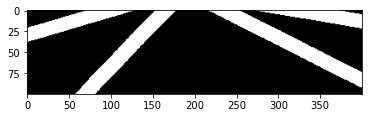

In [42]:
plt.imshow(img[300:400, 600:1000, :] * 255)